In [2]:
import os

data_dir = "D:\\TITO\\Documents\\BANGKIT\\project\\brain_tumour_classification\\Data"

glioma_tumor_training_dir = os.path.join(data_dir, "training", "glioma_tumor")
meningioma_tumor_training_dir = os.path.join(data_dir, "training", "meningioma_tumor")
normal_training_dir = os.path.join(data_dir,"training", "normal")
pituitary_tumor_training_dir = os.path.join(data_dir,"training", "pituitary_tumor")

print('jumlah data training glioma:', len(os.listdir(glioma_tumor_training_dir)))
print('jumlah data training meningioma:', len(os.listdir(meningioma_tumor_training_dir)))
print('jumlah data training gaada tumor:', len(os.listdir(normal_training_dir)))
print('jumlah data training pituitary:', len(os.listdir(pituitary_tumor_training_dir)))

jumlah data training glioma: 702
jumlah data training meningioma: 704
jumlah data training gaada tumor: 280
jumlah data training pituitary: 576


In [3]:
glioma_tumor_validation_dir = os.path.join(data_dir, "validation", "glioma_tumor")
meningioma_tumor_validation_dir = os.path.join(data_dir, "validation", "meningioma_tumor")
normal_validation_dir = os.path.join(data_dir,"validation", "normal")
pituitary_tumor_validation_dir = os.path.join(data_dir,"validation", "pituitary_tumor")

print('jumlah data validasi glioma:', len(os.listdir(glioma_tumor_validation_dir)))
print('jumlah data validasi meningioma:', len(os.listdir(meningioma_tumor_validation_dir)))
print('jumlah data validasi gaada tumor:', len(os.listdir(normal_validation_dir)))
print('jumlah data validasi pituitary:', len(os.listdir(pituitary_tumor_validation_dir)))

jumlah data validasi glioma: 199
jumlah data validasi meningioma: 209
jumlah data validasi gaada tumor: 158
jumlah data validasi pituitary: 268


In [64]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(2,2),activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [65]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 62, 62, 64)        8256      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 31, 31, 64)      

In [66]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(patience=5,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


In [67]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR ="D:\\TITO\\Documents\\BANGKIT\\project\\brain_tumour_classification\\Data\\training"
training_datagen = ImageDataGenerator(rescale = 1./255.0)

VALIDATION_DIR = "D:\\TITO\\Documents\\BANGKIT\\project\\brain_tumour_classification\\Data\\validation"
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size = 16
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=16
)

Found 2262 images belonging to 4 classes.
Found 834 images belonging to 4 classes.


In [69]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3, callbacks=[lr,es])

Epoch 1/25
20/20 [==============================] - 2s 76ms/step - loss: 1.3425 - accuracy: 0.3250 - val_loss: 1.4021 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 2/25
20/20 [==============================] - 1s 69ms/step - loss: 1.3389 - accuracy: 0.3032 - val_loss: 1.5019 - val_accuracy: 0.2292 - lr: 0.0010
Epoch 3/25
20/20 [==============================] - 1s 64ms/step - loss: 1.3093 - accuracy: 0.3387 - val_loss: 1.3351 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/25
20/20 [==============================] - 1s 65ms/step - loss: 1.2539 - accuracy: 0.4097 - val_loss: 1.4555 - val_accuracy: 0.3958 - lr: 0.0010
Epoch 5/25
20/20 [==============================] - 1s 67ms/step - loss: 1.2465 - accuracy: 0.4531 - val_loss: 1.3738 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/25
20/20 [==============================] - 1s 68ms/step - loss: 1.1065 - accuracy: 0.5031 - val_loss: 1.3219 - val_accuracy: 0.3125 - lr: 5.0000e-04
Epoch 7/25
20/20 [==============================] - 1s 65ms/step - loss:

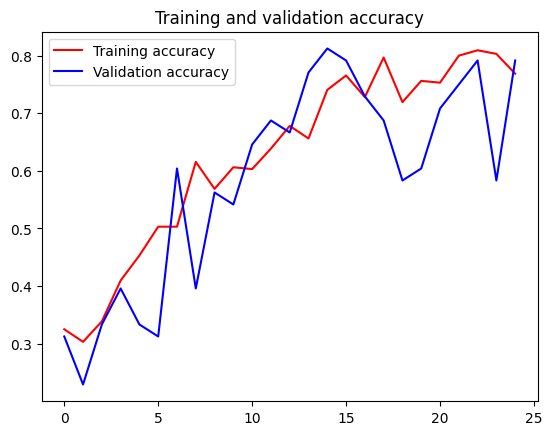

<Figure size 640x480 with 0 Axes>

In [70]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()